## Load libraries

In [26]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [27]:
def plot_history(H, epochs):
    # visualize performance
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Load cifar10 data

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.
testX = testX.astype("float") / 255.

In [3]:
# integers to one-hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# initialize label names for CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", 
              "cat", "deer", "dog", "frog", "horse", 
              "ship", "truck"]

## ShallowNet 

ShallowNet architecture: </br>
>INPUT => CONV => ReLU => FC

In [ ]:
# initialise model
model = Sequential()

# define CONV => RELU layer
model.add(Conv2D(32, (3, 3), 
                 padding="same", 
                 input_shape=(32, 32, 3)))
model.add(Activation("relu"))

# softmax classifier
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [ ]:
opt = SGD(lr =.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

__Model summary__

In [ ]:
model.summary()

__Plot model__

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [ ]:
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=40,
              verbose=1)

__Evaluate model__

In [ ]:
predictions = model.predict(testX, batch_size=32)

In [ ]:
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

plot_model(H)

## LeNet

LeNet architecture:
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [15]:
# define model
model = Sequential()

# first set of CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), 
                 padding="same", 
                 input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(Conv2D(50, (5, 5), 
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [16]:
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

Epoch 1/20
1563/1563 [==============================] - 36s 23ms/step - loss: 2.0402 - accuracy: 0.2543 - val_loss: 1.6021 - val_accuracy: 0.4322
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5335 - accuracy: 0.4546 - val_loss: 1.5499 - val_accuracy: 0.4333
Epoch 3/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3461 - accuracy: 0.5234 - val_loss: 1.2801 - val_accuracy: 0.5445
Epoch 4/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2199 - accuracy: 0.5722 - val_loss: 1.2048 - val_accuracy: 0.5714
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1129 - accuracy: 0.6071 - val_loss: 1.1404 - val_accuracy: 0.6041
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0418 - accuracy: 0.6377 - val_loss: 1.1320 - val_accuracy: 0.6017
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9640 - accuracy: 0.6662 - val_loss: 1.0476 -

__Model summary__

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 50)        40050     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

__Plot model__

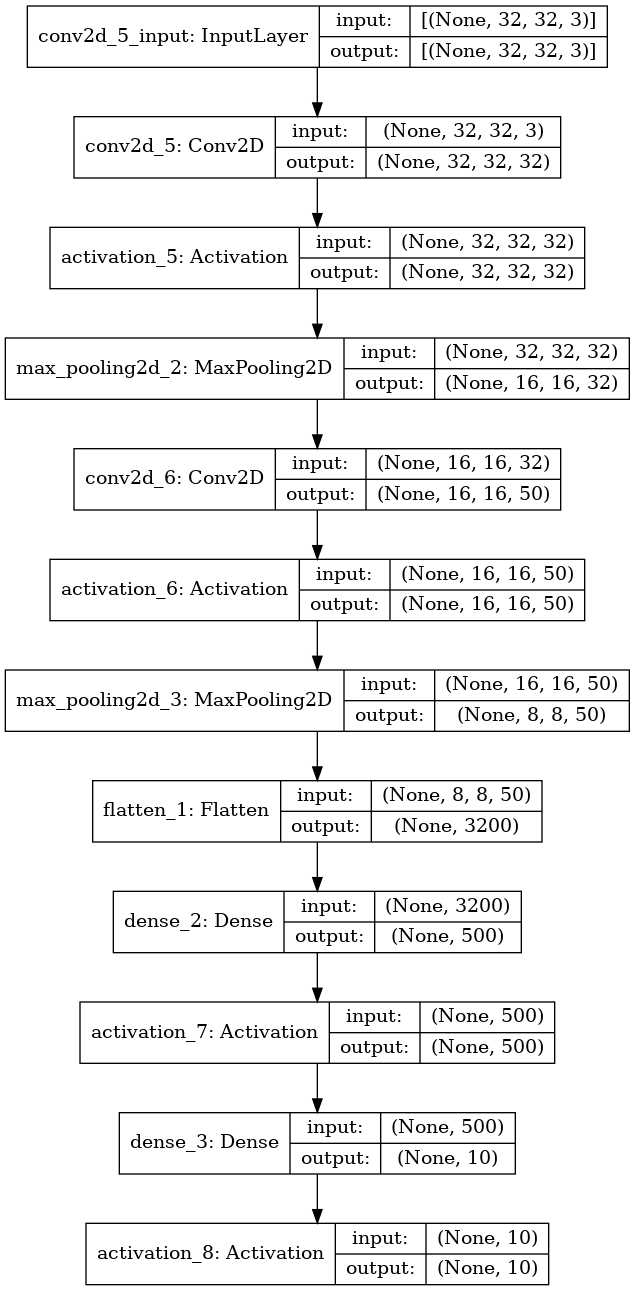

In [29]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [ ]:
# train model
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=20,
              verbose=1)

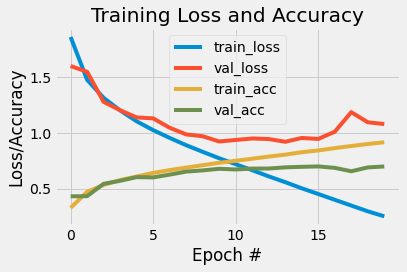

In [22]:
plot_model(H,20)

In [31]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.80      0.69      0.74      1000
  automobile       0.84      0.76      0.80      1000
        bird       0.66      0.57      0.61      1000
         cat       0.59      0.36      0.45      1000
        dear       0.64      0.68      0.66      1000
         dog       0.53      0.72      0.61      1000
        frog       0.69      0.84      0.76      1000
       horse       0.78      0.75      0.76      1000
        ship       0.85      0.78      0.81      1000
       truck       0.68      0.85      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

